In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2
from tensorflow.keras.models import Sequential, Model 
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Input
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications import VGG16

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Let's start diving into the data

In [ ]:
# defining directory paths

ROOT_DIR = "/content/drive/MyDrive/ADS_Practice/Helipad Data"

# path.join from os module join one or more path components intelligently.
IMAGE_DIR = os.path.join(ROOT_DIR, "Images")
ANNOT_DIR = os.path.join(ROOT_DIR, "Labels")

It would be a better idea if you convert file names to python list

In [ ]:
# listdir generates a list of all the files in the directory and return a python list of string file names

images_name_list = os.listdir(IMAGE_DIR)
annots_name_list = os.listdir(ANNOT_DIR)

In [ ]:
images_name_list

['43.jpg',
 '82.jpg',
 '154.jpg',
 '111.jpg',
 '113.jpg',
 '53.jpg',
 '31.jpg',
 '138.jpg',
 '4.jpg',
 '147.jpg',
 '71.jpg',
 '134.jpg',
 '143.jpg',
 '27.jpg',
 '15.jpg',
 '136.jpg',
 '114.jpg',
 '160.jpg',
 '106.jpg',
 '14.jpg',
 '57.jpg',
 '94.jpg',
 '26.jpg',
 '116.jpg',
 '28.jpg',
 '13.jpg',
 '62.jpg',
 '149.jpg',
 '41.jpg',
 '44.jpg',
 '21.jpg',
 '89.jpg',
 '118.jpg',
 '25.jpg',
 '150.jpg',
 '17.jpg',
 '34.jpg',
 '81.jpg',
 '109.jpg',
 '37.jpg',
 '66.jpg',
 '161.jpg',
 '0.jpg',
 '85.jpg',
 '93.jpg',
 '144.jpg',
 '96.jpg',
 '1.jpg',
 '39.jpg',
 '90.jpg',
 '33.jpg',
 '76.jpg',
 '12.jpg',
 '54.jpg',
 '42.jpg',
 '87.jpg',
 '45.jpg',
 '127.jpg',
 '68.jpg',
 '35.jpg',
 '153.jpg',
 '30.jpg',
 '101.jpg',
 '95.jpg',
 '11.jpg',
 '70.jpg',
 '47.jpg',
 '7.jpg',
 '2.jpg',
 '139.jpg',
 '133.jpg',
 '141.jpg',
 '60.jpg',
 '67.jpg',
 '83.jpg',
 '49.jpg',
 '23.jpg',
 '61.jpg',
 '135.jpg',
 '36.jpg',
 '65.jpg',
 '72.jpg',
 '121.jpg',
 '84.jpg',
 '102.jpg',
 '97.jpg',
 '64.jpg',
 '107.jpg',
 '124.jpg

In [ ]:
len(images_name_list)

146

In [ ]:
annots_name_list

['131.xml',
 '133.xml',
 '24.xml',
 '18.xml',
 '149.xml',
 '126.xml',
 '33.xml',
 '62.xml',
 '55.xml',
 '70.xml',
 '145.xml',
 '37.xml',
 '28.xml',
 '136.xml',
 '43.xml',
 '143.xml',
 '120.xml',
 '153.xml',
 '151.xml',
 '123.xml',
 '82.xml',
 '113.xml',
 '101.xml',
 '137.xml',
 '160.xml',
 '71.xml',
 '118.xml',
 '117.xml',
 '63.xml',
 '66.xml',
 '57.xml',
 '81.xml',
 '6.xml',
 '135.xml',
 '139.xml',
 '7.xml',
 '65.xml',
 '49.xml',
 '130.xml',
 '22.xml',
 '73.xml',
 '17.xml',
 '109.xml',
 '132.xml',
 '98.xml',
 '138.xml',
 '25.xml',
 '67.xml',
 '77.xml',
 '93.xml',
 '84.xml',
 '42.xml',
 '85.xml',
 '156.xml',
 '119.xml',
 '69.xml',
 '111.xml',
 '80.xml',
 '134.xml',
 '78.xml',
 '61.xml',
 '39.xml',
 '30.xml',
 '125.xml',
 '58.xml',
 '9.xml',
 '144.xml',
 '60.xml',
 '162.xml',
 '5.xml',
 '99.xml',
 '76.xml',
 '1.xml',
 '2.xml',
 '36.xml',
 '92.xml',
 '87.xml',
 '103.xml',
 '72.xml',
 '142.xml',
 '13.xml',
 '147.xml',
 '107.xml',
 '53.xml',
 '50.xml',
 '54.xml',
 '44.xml',
 '114.xml',
 '1

In [ ]:
len(annots_name_list)

146

In [ ]:
# sorting your file names list will allow you to just use index on the list, as the names of images and annots are same,
# if you ask for 5th object in both the list, you will get the image and annotation for that image only

images_name_list = sorted(images_name_list)
annots_name_list = sorted(annots_name_list)

In [ ]:
# to look at the images and annotation names from index 0 to 4 i.e. 5 from starting

print(annots_name_list[:10])
print(images_name_list[:10])

['0.xml', '1.xml', '10.xml', '101.xml', '102.xml', '103.xml', '104.xml', '106.xml', '107.xml', '108.xml']
['0.jpg', '1.jpg', '10.jpg', '101.jpg', '102.jpg', '103.jpg', '104.jpg', '106.jpg', '107.jpg', '108.jpg']


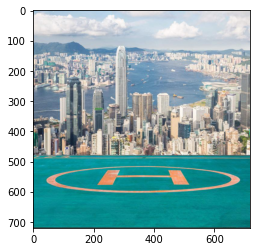

In [ ]:
# lets check out one of our image
# again, please follow along the documentations of all the functions used...
img = Image.open(os.path.join(IMAGE_DIR, "1.jpg"))
img  = np.asarray(img)
plt.imshow(img)

Some typical SpaceX Landing pad images

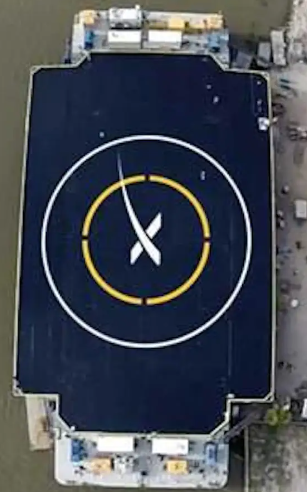

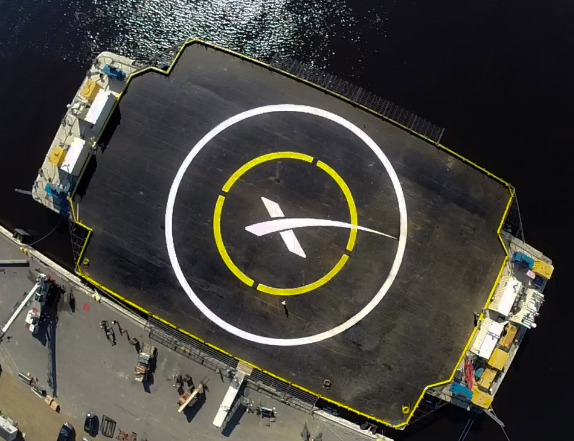

Now, let's prepare our images

In [ ]:
# image size, width = height = 224 pixels

IMAGE_SIZE = 224

# X will our main image array and it will contain all the images array
# first we are defining it as a list

X = []

# using for loop to iterate through all the objects in the images_name_list, objects are file names
for img_name in images_name_list:
    
    # joining path to image dir to image name to get the full path to the image
    img_path = os.path.join(IMAGE_DIR, img_name) 
    
    # imread is used to read an image from file path, it return an array of the image 
    # 1 is used because we want RGB image, if you want to use greyscale image, use 0.
    img = cv2.imread(img_path, 1)
    
    # resize all image to a fix size (224, 224, 3). 3 defines the channels (Red, green blue)
    img = cv2.resize(img, (IMAGE_SIZE, IMAGE_SIZE))    #?????????????????? Let students to decide 
    
    # appending all the images to X, one by one
    X.append(img)
    
# Converting into array
X = np.asarray(X, dtype = np.float32)
print('X_shape before reshaping',X.shape)

X_shape before reshaping (146, 224, 224, 3)


In [ ]:
X

array([[[[192., 212., 231.],
         [181., 197., 211.],
         [218., 228., 238.],
         ...,
         [ 94.,  95.,  56.],
         [ 94.,  95.,  56.],
         [ 94.,  95.,  56.]],

        [[189., 208., 228.],
         [164., 180., 195.],
         [194., 205., 215.],
         ...,
         [ 94.,  95.,  56.],
         [ 94.,  95.,  56.],
         [ 94.,  95.,  56.]],

        [[191., 210., 230.],
         [165., 181., 196.],
         [190., 200., 210.],
         ...,
         [ 94.,  95.,  56.],
         [ 94.,  95.,  56.],
         [ 94.,  95.,  56.]],

        ...,

        [[223., 237., 247.],
         [202., 219., 236.],
         [198., 219., 240.],
         ...,
         [ 73.,  80.,  45.],
         [ 73.,  80.,  45.],
         [ 73.,  80.,  45.]],

        [[236., 249., 255.],
         [182., 198., 214.],
         [191., 212., 232.],
         ...,
         [ 73.,  80.,  45.],
         [ 73.,  80.,  45.],
         [ 73.,  80.,  45.]],

        [[212., 225., 239.],
       

In [ ]:
# pixel range is 0-255 currently. 
# we will normalize it between (0-1) for less computation
X = X/255.0

# lets check the final shape of the Final Image Array
print('X_Shape afer reshaping',X.shape)

X_Shape afer reshaping (146, 224, 224, 3)


Preparing Helipad detection boxes in the Image

In [ ]:
annot_path = os.path.join(ANNOT_DIR, annots_name_list[1])

# for our python to understand the xml files, we need an XML parser
# ET from xml module create a tree structure of the whole xml file

import xml.etree.ElementTree as ET

'''
<annotation>
	<folder>Images</folder>
	<filename>1.jpeg</filename>
	<path>/home/Windows/Downloads/HeliPad dataset/Images/1.jpeg</path>
	<source>
		<database>Unknown</database>
	</source>
	<size>
		<width>196</width>
		<height>258</height>
		<depth>3</depth>
	</size>
	<segmented>0</segmented>
	<object>
		<name>moon</name>
		<pose>Unspecified</pose>
		<truncated>0</truncated>
		<difficult>0</difficult>
		<bndbox>
			<xmin>87</xmin>
			<ymin>129</ymin>
			<xmax>113</xmax>
			<ymax>158</ymax>
		</bndbox>
	</object>
</annotation>

This is what the whole structure of an xml file looks like
'''


# parsing an xml file from the file name
tree = ET.parse(annot_path)

# getting the root element
root = tree.getroot()
# root has a tag ("annotation") and a dictionary of attributes:

# now we need to find the size of our image file
size = root.find("size")

# extracting height and width of image file
h = int(size.find("height").text)
w = int(size.find("width").text)

# extracting coordinates of bounding box of our moon 
bndbox = root.find("object").find("bndbox")

# top left of image is (0,0) and then it increase to rightwards and downwards
# xmin and ymin are the coordinates of upper left corner and
# xmax and ymax are the coordinates of the lower right corner
xmin = int(bndbox.find("xmin").text)/w
xmax = int(bndbox.find("xmax").text)/w

# ------------------------------------------------------------------------

#TASK - 3

# similarly do it for ymin and ymax too

# HINT: key is devide by height instead of width

ymin = int(bndbox.find("ymin").text)/h           
ymax = int(bndbox.find("ymax").text)/h          

#--------------------------------------------------------------------------

# now here is an important thing to understand
# remember we resized our image to a specific size (224, 224), but our annotations stayed the same. 
# so what we did here above is reduced the value of coordinates with unitery method 
# and now we will multiply them with our required size to fix them exactly as we need
xmin = int(xmin * 224)
xmax = int(xmax * 224)
ymin = int(ymin * 224)
ymax = int(ymax * 224)

(7, 158)
(218, 193)


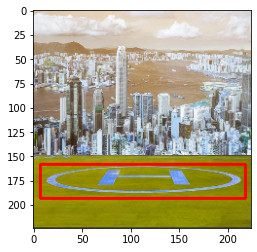

In [ ]:
# defining rectangle function params value
start_point = (xmin, ymin)
end_point = (xmax, ymax)
color = (255, 0, 0)  # Make only one channel alive out of 3 channels
thickness = 2        # Thickness of bounding box   

# to access the example image using openCV
# using rectangle function to make the bounding box on the image
example_img = cv2.rectangle(X[1], start_point, end_point, color, thickness)

print(start_point)
print(end_point)

# to plot the image
plt.imshow(example_img) 
plt.show()

Now let's prepare y, our expected output from the model.

In [ ]:
y = []

# we will do exactly as we did above
for annot_name in annots_name_list:
    annot_path = os.path.join(ANNOT_DIR, annot_name)
    tree = ET.parse(annot_path)
    root = tree.getroot()
    size = root.find("size")
    h = int(size.find("height").text)
    w = int(size.find("width").text)

    bndbox = root.find("object").find("bndbox")
    xmin = int(bndbox.find("xmin").text)/w
    xmax = int(bndbox.find("xmax").text)/w
    ymin = int(bndbox.find("ymin").text)/h
    ymax = int(bndbox.find("ymax").text)/h
    
    y.append([xmin, ymin, xmax, ymax])
    
y = np.asarray(y, dtype = np.float32)
print(y.shape)
# For every image of size (224,224,3) we want four values defining the coordinates of the box

(146, 4)


Let's segregate the data into training and test

In [ ]:
# it's a good pratice to divide your data into two sets, training set on which your model will be trained
# and testing set, on which your model will be tested


# ------------------------------------------------------------------------

#TASK - 4
# devide you data into training and test set
# HINT: separate first 60 image and annots for training set and other 15 for test set
# use slicing to separate the array [:]

# training set
x_train = X[:140]      
# test images form 60 to end
x_test = X[140:]      
# this is training set for labels
y_train = y[:140]      
# test set for labels
y_test = y[140:]      

#--------------------------------------------------------------------------

In [ ]:
print("X_train.shape:",x_train.shape)
print("y_train.shape:",y_train.shape)
print("x_test.shape:",x_test.shape)
print("y_test.shape:",y_test.shape)

X_train.shape: (140, 224, 224, 3)
y_train.shape: (140, 4)
x_test.shape: (6, 224, 224, 3)
y_test.shape: (6, 4)


Build Neural Network

In [ ]:
# Sequential groups a linear stack of layers into a tf.keras.Model.
model = Sequential()

model.add(Conv2D(1024, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation ='relu'))
model.add(Dense(64, activation ='relu'))
model.add(Dense(4, activation = "softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 1024)    28672     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 1024)   0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 512)     4719104   
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 512)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 256)       1179904   
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 256)      0

In [ ]:
model.compile(optimizer='adam',
              loss = "mse",
              metrics=['accuracy'])


# fit method Trains the model for a fixed number of epochs (iterations on a dataset).
# here we fit the model into our own dataset and train it for 30 epochs with batch size of 

history = model.fit(x_train, y_train, epochs=30, batch_size = 4)

Epoch 1/30
35/35 [==============================] - 23s 250ms/step - loss: 0.1274 - accuracy: 0.4571
Epoch 2/30
35/35 [==============================] - 9s 251ms/step - loss: 0.1191 - accuracy: 0.5286
Epoch 3/30
35/35 [==============================] - 9s 253ms/step - loss: 0.1172 - accuracy: 0.4500
Epoch 4/30
35/35 [==============================] - 9s 255ms/step - loss: 0.1176 - accuracy: 0.5214
Epoch 5/30
35/35 [==============================] - 9s 258ms/step - loss: 0.1164 - accuracy: 0.5500
Epoch 6/30
35/35 [==============================] - 9s 262ms/step - loss: 0.1166 - accuracy: 0.5357
Epoch 7/30
35/35 [==============================] - 9s 264ms/step - loss: 0.1154 - accuracy: 0.5286
Epoch 8/30
35/35 [==============================] - 9s 266ms/step - loss: 0.1142 - accuracy: 0.5714
Epoch 9/30
35/35 [==============================] - 9s 270ms/step - loss: 0.1142 - accuracy: 0.5500
Epoch 10/30
35/35 [==============================] - 10s 275ms/step - loss: 0.1136 - accuracy: 0.61

Get predictions from our trained model on the test se

In [ ]:
# prediction for all test set
# using predict function
preds = model.predict(x_test)

1/1 [==============================] - 3s 3s/step


Generating final results

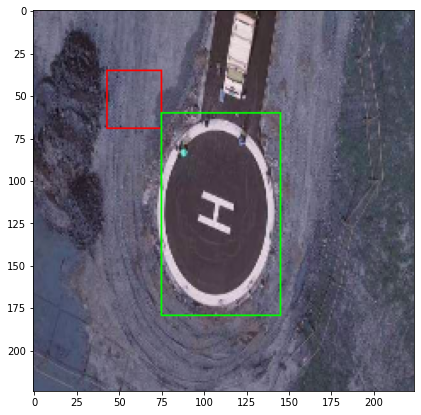

In [ ]:
sample_index = 5

# finding coordinates for our prediction and actual bounding boxes
pred_bb = [int(i*224) for i in preds[sample_index]]
actual_bb = [int(i*224) for i in y_test[sample_index]]

# start point is top left corner and end point is bottom right corner
pred_start_point = (pred_bb[0], pred_bb[1])
pred_end_point = (pred_bb[2], pred_bb[3])

actual_start_point = (actual_bb[0],actual_bb[1])
actual_end_point = (actual_bb[2], actual_bb[3])

# colors for the box
red = (255, 0, 0) # actual
green = (0, 255, 0) # preds
thickness = 1

# ------------------------------------------------------------------------

# TASK - 6

# here is your final task
# use rectange function as used previously to show the actual and predicted bounded boxes on the test image
# use image with index as sample_index from test set and predicted start and end points to draw the red bounding box

img_with_predicted_bb = cv2.rectangle(x_test[sample_index],pred_start_point,pred_end_point,red,thickness)

#--------------------------------------------------------------------------

img_with_pred_and_actual_bb = cv2.rectangle(img_with_predicted_bb, actual_start_point, actual_end_point, green, thickness) 



# to show final image
plt.figure(figsize= (7,7))
plt.imshow(img_with_pred_and_actual_bb)
plt.show()

You should see an image with two bounding boxes, the green bb is the actual box and red is the predicted box from the model.

Some results can be absured because despite using a very large model, our dataset was very very small campared to the datasets that contains thousands of images.